In [1]:
#import 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Import and Checking

In [2]:
#get dataset
df = pd.read_csv('Dataset.csv', encoding = 'utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392105 entries, 0 to 392104
Data columns (total 8 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Order Id                                     392105 non-null  int64 
 1   Product categorie                            392105 non-null  object
 2   Product subcategorie                         391264 non-null  object
 3   Product reference                            392105 non-null  int64 
 4   Product quantity                             392105 non-null  int64 
 5   Total price (unit price x product quantity)  392105 non-null  object
 6   Supplier country                             392105 non-null  object
 7   Supplier ID                                  392105 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 23.9+ MB


In [4]:
try:
    df['Total price (unit price x product quantity)'] = df['Total price (unit price x product quantity)'].astype(float)
except ValueError as err:
    print("There is an error : ",err)
print("Converting this 'number' failed because of the gap between thousands and hundreds. All gap must be deleted")

try:
    df['Total price (unit price x product quantity)'] = df['Total price (unit price x product quantity)'].apply(lambda x: float(x.split()[0].replace(' ', '')))
    df['Total price (unit price x product quantity)'] = df['Total price (unit price x product quantity)'].astype(float)
except ValueError as err:
    print(err)

#Get a simple view of the dataset
df

There is an error :  could not convert string to float: '1 140.48'
Converting this 'number' failed because of the gap between thousands and hundreds. All gap must be deleted


,Order Id,Product categorie,Product subcategorie,Product reference,Product quantity,Total price (unit price x product quantity),Supplier country,Supplier ID
0,61865,Spirits,Anise,483222,2,14.90,Spain,1
1,62447,Wine,Rosé,822222,12,64.20,Spain,1
2,64401,Spirits,Herbal liquor,434732,1,13.15,Spain,2
3,64588,Wine,red,600772,30,172.50,Spain,3
4,64674,Spirits,Tequila,857357,1,36.70,Spain,1
...,...,...,...,...,...,...,...,...
392100,345866,Spirits,Whiskey,1148070,1,204.95,Spain,92
392101,345866,Spirits,Whiskey,1266684,1,187.25,Spain,92
392102,345866,Spirits,Vermouth,535065,1,8.18,Spain,92
392103,345867,Spirits,Vodka,436899,1,12.77,Spain,86


In [5]:
#Check dataset

#Check for null value
df.isnull().sum()

Order Id                                         0
Product categorie                                0
Product subcategorie                           841
Product reference                                0
Product quantity                                 0
Total price (unit price x product quantity)      0
Supplier country                                 0
Supplier ID                                      0
dtype: int64

In [6]:
print(df[df.isnull().any(axis=1)]['Product categorie'].unique())

['Beer']


In [7]:
for col in list(df.select_dtypes(['object']).columns):
  print(df[col].sort_values().unique())

['Accessories' 'Beer' 'Christmas gifts' 'Gourmet' 'Lots and gifts'
 'Spirits' 'Wine']
['Abbey' 'Absinthe' 'Absinthe service accessories' 'Accessories'
 'Aerators & oxygenators' 'Aguardiente' 'Alcohol-free' 'Ale' 'Algae'
 'Altbier' 'Amaretto' 'AmbrÃ©e beer' 'American Pale Ale' 'Anise'
 'Appetizers' 'Armagnac' 'Aroma kits' 'Bakery' 'Barley wine'
 'Belgian Strong Pale Ale' 'Bio' 'Bitter' 'Black IPA' 'Black beer'
 'Blond Ale' 'Bock' 'Books' 'Bottle racks' 'Bourbon' 'Brandy' 'Brown Ale'
 'CachaÃ§a' 'Calvados' 'Caviar' 'Champagne' 'Cheese' 'Chocolate'
 'Christmas' 'Christmas Gift Baskets' 'Christmas Gifts'
 'Christmas Gourmet Selection' 'Christmas baskets' 'Cider'
 'Cocktail service accessories' 'Cocottes and fondues' 'Coffee'
 'Coffee liquor' 'Coffeemakers and teapots' 'Cognac' 'Condiments'
 'Coolers' 'Corkscrews' 'Craft' 'Decanters' 'Deli' 'Desserts & Sweets'
 'Dortmunder' 'Dried fruits' 'Dubbel' 'Export' 'Flask' 'Frangelico'
 'Fruit' 'Fruit liquor' 'Fruits' 'Gift boxes' 'Gift packs' 'Gift

# Analysis

## Sales

In [15]:
income = df['Total price (unit price x product quantity)'].sum()
n_order = len(df['Order Id'].unique())
avg_order_value = income/n_order

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = income,
    title = {"text": "Total Sales"},
    domain = {'x': [0, 1/3], 'y': [0, 1]},))

fig.add_trace(go.Indicator(
    mode = "number",
    value = n_order,
    title = {"text": "Total N. Order"},
    domain = {'x': [1/3, 2/3], 'y': [0, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = avg_order_value,
    title = {"text": "Average Order Value"},
    domain = {'x': [2/3, 1], 'y': [0, 1]}))

fig.show()

The violin plot is showing the distribution of order values. As we can see, the majority of orders are concentrated between 0 and 150 in value (boxplot). And more particularly, the highest orders can be considered outlier in the statistical model (3 times std value)


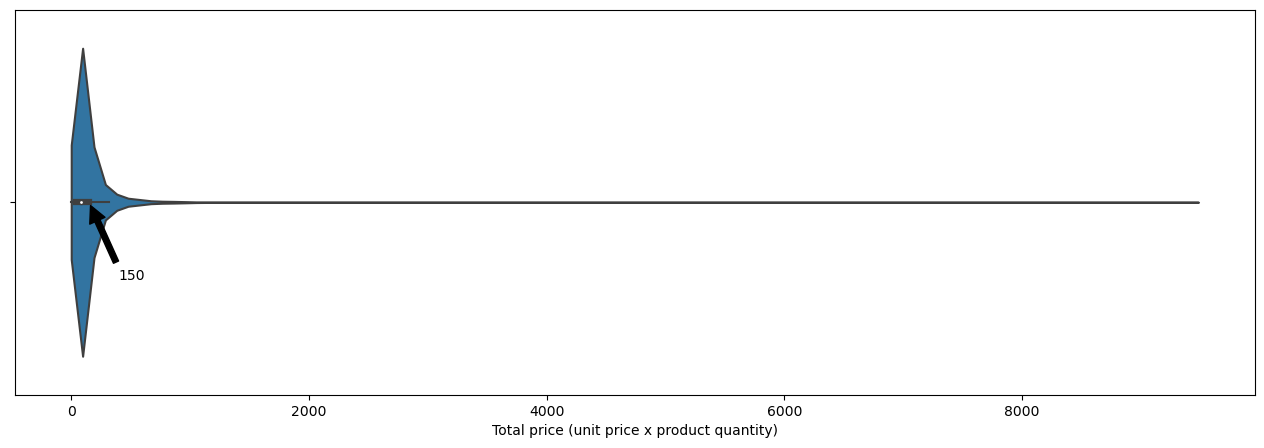

In [9]:
byOrder = df[['Order Id','Total price (unit price x product quantity)']].groupby('Order Id').sum()

plt.figure(figsize=(16, 5))
plt.annotate('150', xy=(150, 0), xytext=(400, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
sns.violinplot(x=byOrder['Total price (unit price x product quantity)'], cut = 0);
print("The violin plot is showing the distribution of order values. As we can see, the majority of orders are concentrated between 0 and 150 in value (boxplot). And more particularly, the highest orders can be considered outlier in the statistical model (3 times std value)")

When these outliers are ignored, we can have a better focus on the average orders


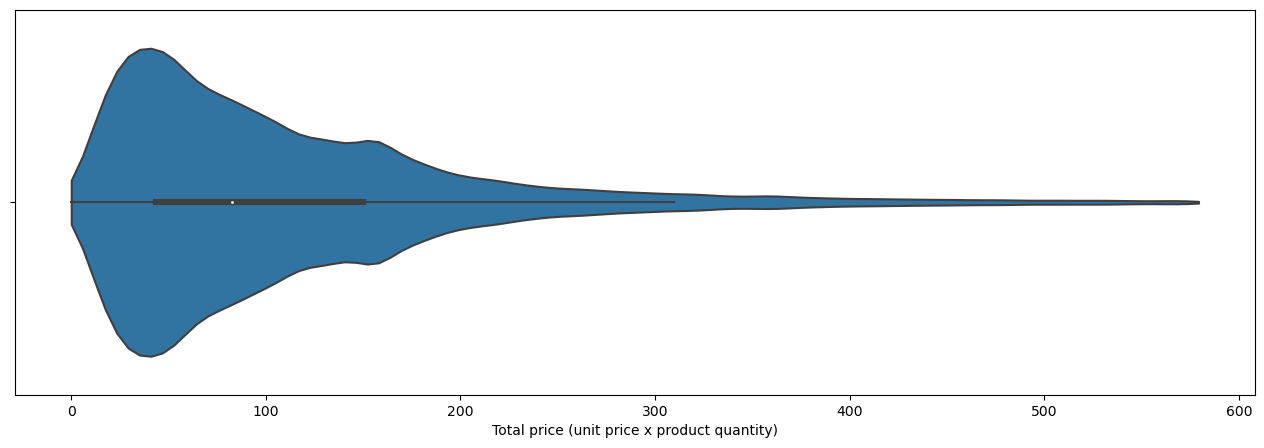

In [10]:
byOrder_no_outlier = byOrder[(np.abs(stats.zscore(byOrder)) < 3).all(axis=1)]
plt.figure(figsize=(16, 5))
print("When these outliers are ignored, we can have a better focus on the average orders")
sns.violinplot(x=byOrder_no_outlier['Total price (unit price x product quantity)'], cut = 0);

### Focus on the average order value

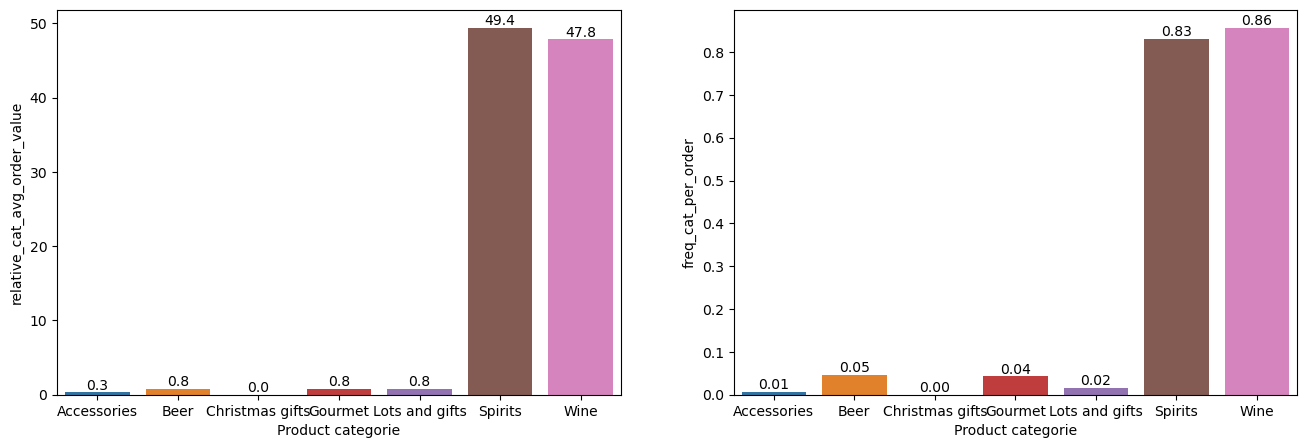

In [37]:
byCategory = df.groupby('Product categorie').agg({'Order Id' : ['count'],
                                                  'Total price (unit price x product quantity)' : ['sum']})

byCategory['freq_cat_per_order'] = byCategory['Order Id']/n_order
byCategory['cat_avg_order_value'] = byCategory['Total price (unit price x product quantity)']/n_order
byCategory['relative_cat_avg_order_value'] = 100*byCategory['cat_avg_order_value']/avg_order_value

plt.figure(figsize=(16, 5))
plt.subplot(121)
ax = sns.barplot(data = byCategory, x= byCategory.index, y='relative_cat_avg_order_value');
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    
plt.subplot(122)
ax = sns.barplot(data = byCategory, x= byCategory.index, y='freq_cat_per_order');
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')


# Statistical Model

In [11]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = byOrder_no_outlier['Total price (unit price x product quantity)'].sum(),
    title = {"text": "Total Sales"},
    domain = {'x': [0, 1/3], 'y': [0, 1]},))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(byOrder_no_outlier['Total price (unit price x product quantity)']),
    title = {"text": "Total N. Order"},
    domain = {'x': [1/3, 2/3], 'y': [0, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = byOrder_no_outlier['Total price (unit price x product quantity)'].sum()/len(byOrder_no_outlier['Total price (unit price x product quantity)']),
    title = {"text": "Average Order Value"},
    domain = {'x': [2/3, 1], 'y': [0, 1]}))

fig.show()

In [12]:
Statistic = list(byOrder_no_outlier.index.values)